In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
# data
dim_claim = pd.read_csv('../CoverMyMeds_data/dim_claims.csv')
dim_PA = pd.read_csv('../CoverMyMeds_data/dim_pa.csv')

# CLAIMS

In [3]:
dim_claim.head(10)

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1
5,6,417740,A,NaN,1
6,7,999001,A,NaN,1
7,8,417740,A,NaN,1
8,9,999001,A,NaN,1
9,10,417380,A,75.0,0


In [4]:
# number of observations
print ('Number of observations:', len(dim_claim))

Number of observations: 1335576


In [5]:
# number of unique payers
payers = dim_claim.bin.unique()
payer_freq = dim_claim.groupby('bin')['dim_claim_id'].nunique()
print('unique payers:',payers)
print ('payer frequency:',payer_freq )

unique payers: [417380 999001 417740 417614]
payer frequency: bin
417380    173531
417614    307323
417740    213982
999001    640740
Name: dim_claim_id, dtype: int64


In [6]:
# number of unique drugs
drugs = dim_claim.drug.unique()
print(drugs)

['A' 'B' 'C']


# Reject Codes

In [7]:
# number of unique reject codes
reject_code = dim_claim.reject_code.unique()
print (reject_code)

[75. nan 76. 70.]


In [8]:
# Check if all reject_codes with nan were approved
dim_claim[(dim_claim['reject_code'].isnull())&(dim_claim['pharmacy_claim_approved']!=1)]

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved


#### All claims with reject code NaN were approved

In [9]:
# make copy of dim_claim
dim_claim_copy = dim_claim.copy()

# Set Nan to reject code -99
dim_claim_copy.reject_code.replace(np.nan, -99, inplace=True)

In [10]:
# Converting reject code to text

dim_claim_copy['reject_reason'] = 'Approved'
dim_claim_copy.loc[dim_claim_copy.reject_code == 70, 'reject_reason'] = 'Not_in_formulary'
dim_claim_copy.loc[dim_claim_copy.reject_code == 75, 'reject_reason'] = 'In_formulary_needs_PA'
dim_claim_copy.loc[dim_claim_copy.reject_code == 76, 'reject_reason'] = 'Limit_exceeded'

In [11]:
# Approved drugs
dim_claim_approved = dim_claim_copy[dim_claim_copy.reject_code==-99]

# Rejected drugs
dim_claim_rejected = dim_claim_copy[dim_claim_copy.reject_code!=-99]


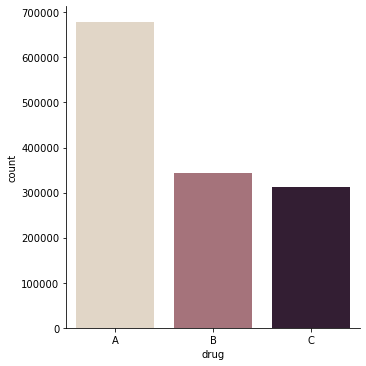

In [12]:
# Frequency of drugs

sns.catplot(x='drug', kind ='count', palette = 'ch:.25', data= dim_claim_copy)
plt.show()

#### Drug A is most common compared to B and C.

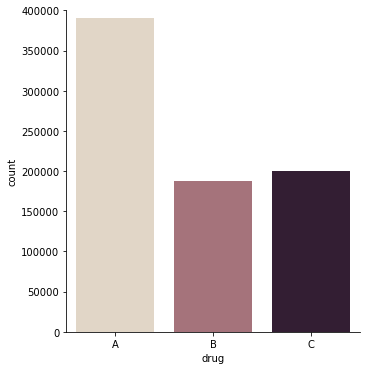

In [13]:
# Approval frequency of drugs

sns.catplot(x="drug", kind="count", palette="ch:.25", data= dim_claim_approved)
plt.ylim(0,400000)
plt.show()

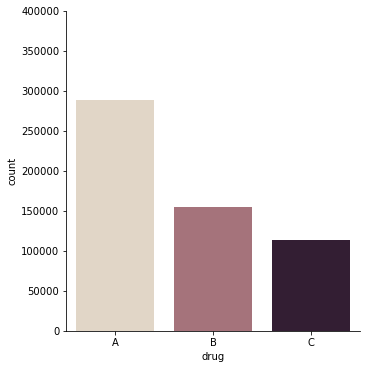

In [14]:
# Rejection frequency of drugs

sns.catplot(x="drug", kind="count", palette="ch:.25", data= dim_claim_rejected)
plt.ylim(0,400000)
plt.show()

#### Since its not clear from the above plots which drug is most likely to be approved/rejected, I look at the fraction of each drug approved/rejected.

In [15]:
drug_A_app, drug_B_app, drug_C_app = dim_claim_approved.groupby('drug')['dim_claim_id'].nunique()
drug_A, drug_B, drug_C = dim_claim_copy.groupby('drug')['dim_claim_id'].nunique()

In [16]:
w_A = drug_A_app/drug_A
w_B = drug_B_app/drug_B
w_C = drug_C_app/drug_C

weights = [w_A, w_B, w_C]

In [17]:
weights

[0.5755936774510771, 0.549199124726477, 0.6391340262739083]

### Drug C has a higher chance of getting approved than A and B.

# Reject Codes

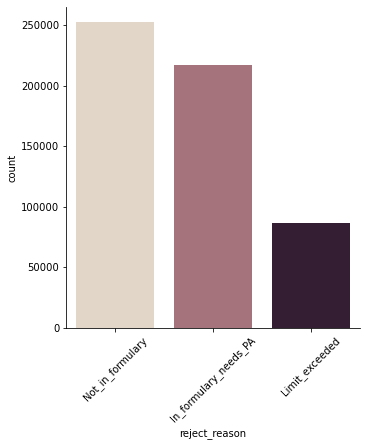

In [18]:
# Frequency of rejection codes

chart = sns.catplot(x="reject_reason", kind="count", palette="ch:.25", data= dim_claim_rejected, order=['Not_in_formulary', 'In_formulary_needs_PA','Limit_exceeded'], )
chart.set_xticklabels(rotation=45)
plt.show()

#### Reject Codes 
70 - Drug not covered/ not on formulary <br>
75 - Drug on formulary/ not preferred, requires PA <br>
76 - Drug covered, plan limitation exceeded

<AxesSubplot:xlabel='reject_code'>

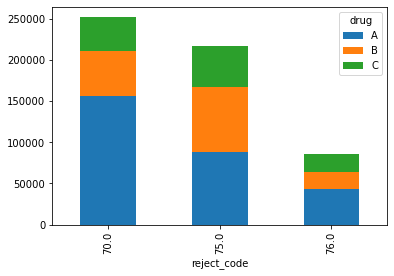

In [19]:
pd.crosstab(dim_claim_rejected['reject_code'], dim_claim_rejected['drug']).plot(kind='bar', stacked=True)

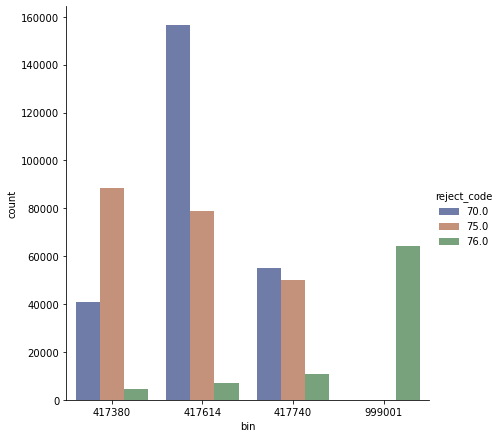

In [20]:
sns.catplot(data=dim_claim_rejected, kind="count",x="bin", hue="reject_code", ci="None", palette="dark", alpha=.6, height=6)

In [21]:
print (pd.crosstab(dim_claim_rejected['bin'], [dim_claim_rejected['reject_code'], dim_claim_rejected['drug']]))

reject_code    70.0                 75.0                 76.0              
drug              A      B      C      A      B      C      A      B      C
bin                                                                        
417380            0      0  40674  88486      0      0      0   4419      0
417614       156497      0      0      0  78686      0      0      0   7085
417740            0  55035      0      0      0  50179  10817      0      0
999001            0      0      0      0      0      0  32492  16372  15209


## Summary

BIN 417380 : Drug C is not in the formulary, Drug A is in the formulary but needs PA, Drug B is covered but limit exceeded <br>

BIN 417614 : Drug A is not in the formulary, Drug B is in the formulary, needs PA, Drug C is covered but limit exceeded <br>

BIN 417740 : Drug B is not in the formulary, Drug C is in the formulary, needs PA, Drug A is covered but limit exceeded <br> 

BIN 999001 : All drugs covered, limit exceeded for all. 


# Prior Authorization

In [22]:
dim_PA_copy = dim_PA.copy()

In [23]:
len(dim_PA_copy)

555951

In [24]:
dim_PA_copy.head(10)

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1
5,6,1,1,0,1
6,7,0,1,0,1
7,8,1,0,1,0
8,9,1,0,1,0
9,10,1,1,0,1


In [25]:
# Cases when PA is approved
dim_PA_approved=dim_PA_copy[dim_PA_copy.pa_approved ==1]

print ('Number of PA approved cases:', len(dim_PA_approved))

# Cases when PA is rejected
dim_PA_rejected = dim_PA_copy[dim_PA_copy.pa_approved ==0 ]

print ('Number of PA rejected cases:', len(dim_PA_rejected))

Number of PA approved cases: 408319
Number of PA rejected cases: 147632


In [26]:
# When PA is approved
dim_PA_approved[['correct_diagnosis','tried_and_failed','contraindication','pa_approved']].drop_duplicates()

,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,0,1
1,1,0,0,1
2,0,0,1,1
4,0,1,0,1
10,1,1,1,1
18,0,0,0,1
50,1,0,1,1
53,0,1,1,1


In [27]:
# When PA is rejected
dim_PA_rejected[['correct_diagnosis','tried_and_failed','contraindication','pa_approved']].drop_duplicates()

,correct_diagnosis,tried_and_failed,contraindication,pa_approved
7,1,0,1,0
11,1,1,0,0
15,1,1,1,0
17,1,0,0,0
42,0,0,1,0
43,0,0,0,0
70,0,1,1,0
229,0,1,0,0


# When is a PA approved?

1. Correct_diagnosis = 1 
2. Correct_diagnosis , tried and failed = 1
3. Correct_diagnosis, contraindication = 1
<br>
<br>
4. contraindication =1
5. tried_and_failed =1
6. tried_and_failed , contraindication =1
7. no field = 1

# PA can be rejected for the above cases as well

In [28]:
# create a list of our conditions

def condition_values (df):
    conditions = [
        (df['correct_diagnosis']==1) & (df['tried_and_failed']==0) & (df['contraindication']==0),
        (df['correct_diagnosis']==1) & (df['tried_and_failed']==1) & (df['contraindication']==0),
        (df['correct_diagnosis']==1) & (df['tried_and_failed']==0) & (df['contraindication']==1),
        (df['correct_diagnosis']==1) & (df['tried_and_failed']==1) & (df['contraindication']==1),
        (df['correct_diagnosis']==0) & (df['tried_and_failed']==1) & (df['contraindication']==0),
        (df['correct_diagnosis']==0) & (df['tried_and_failed']==1) & (df['contraindication']==1),
        (df['correct_diagnosis']==0) & (df['tried_and_failed']==0) & (df['contraindication']==1),
        (df['correct_diagnosis']==0) & (df['tried_and_failed']==0) & (df['contraindication']==0)
        ]

    # create a list of the values we want to assign for each condition
    values = ['T1', 'T2', 'T3', 'T4','T5','T6','T7','T8']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['Type'] = np.select(conditions, values)
    
    return None

In [29]:
# Assigning types to each case where the PA was either rejected or approved.

condition_values (dim_PA_copy)

In [30]:
# Cases when PA is approved
dim_PA_approved_1=dim_PA_copy[dim_PA_copy.pa_approved ==1]

print ('Number of PA approved cases:', len(dim_PA_approved_1))

# Cases when PA is rejected
dim_PA_rejected_1 = dim_PA_copy[dim_PA_copy.pa_approved ==0 ]

print ('Number of PA rejected cases:', len(dim_PA_rejected_1))

Number of PA approved cases: 408319
Number of PA rejected cases: 147632


In [31]:
dim_PA_approved_1.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,Type
0,1,1,1,0,1,T2
1,2,1,0,0,1,T1
2,3,0,0,1,1,T7
3,4,1,1,0,1,T2
4,5,0,1,0,1,T5


<AxesSubplot:xlabel='Type'>

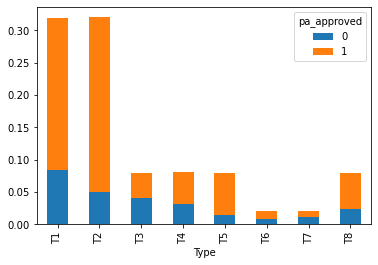

In [32]:
pd.crosstab(dim_PA_copy['Type'], dim_PA_copy['pa_approved'], normalize=True).plot(kind='bar', stacked=True)

### Chances of getting approved are highest for Types T1 and T2. 

T1 : correct_diagnosis =1 <br>
T2 : correct_diagnosis, tried_and_failed =1
<br>
Which is where most of the claims are. It is interesting that for types T3 and T4, it is almost equally likely that the claim may be approved or rejected. <br>

(Added later : This might be due to contraindication = 1)

For claim T5 (tried_and_failed =1) and T8 (all zero) the chance for approval is higher than that of rejection. There might be other factors that influence the approval or rejection of the PA other than the three columns in the PA table.


# Merge PA and CLAIMS tables

In [33]:
bridge = pd.read_csv('../CoverMyMeds_data/bridge.csv')

In [34]:
bridge.head()

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1


In [35]:
bridge_copy = bridge.copy()

In [36]:
# merge bridge['dim_claim_id'] and CLAIMS tables
dim_claim_bridge = dim_claim_copy.merge(bridge_copy, on = 'dim_claim_id', how='inner')

In [37]:
dim_claim_bridge.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,reject_reason,dim_pa_id,dim_date_id
0,1,417380,A,75.0,0,In_formulary_needs_PA,1.0,1
1,2,999001,A,-99.0,1,Approved,NaN,1
2,3,417740,A,76.0,0,Limit_exceeded,2.0,1
3,4,999001,A,-99.0,1,Approved,NaN,1
4,5,417740,A,-99.0,1,Approved,NaN,1


In [38]:
# Do all pharmacy claims approved have null dim_pa_id?
dim_claim_bridge[(dim_claim_bridge['pharmacy_claim_approved']==1) & (dim_claim_bridge['dim_pa_id'].isnull())].shape

(779625, 8)

In [39]:
# Distribution of pharmacy_claims
dim_claim_bridge['pharmacy_claim_approved'].value_counts(dropna =False)

1    779625
0    555951
Name: pharmacy_claim_approved, dtype: int64

In [40]:
# dim_claim_approved
dim_bridge_claim_approved = dim_claim_bridge[dim_claim_bridge['pharmacy_claim_approved']==1]

In [41]:
# dim_claim_rejected
dim_bridge_claim_rejected = dim_claim_bridge[dim_claim_bridge['pharmacy_claim_approved']==0]

In [42]:
len(dim_PA_copy)

# length of dim_PA_copy = length of dim_bridge_claim_rejected

555951

In [43]:
# merge dim_bridge_claim_rejected and pa_id 

dim_pa_claim_rejected=dim_bridge_claim_rejected.merge(dim_PA_copy, on='dim_pa_id', how='inner')

In [44]:
# write to csv
dim_pa_claim_rejected.to_csv('../CoverMyMeds_data/dim_pa_claim_rejected.csv', index = None)

# Why a PA of particular type (Ttype) is approved or rejected?

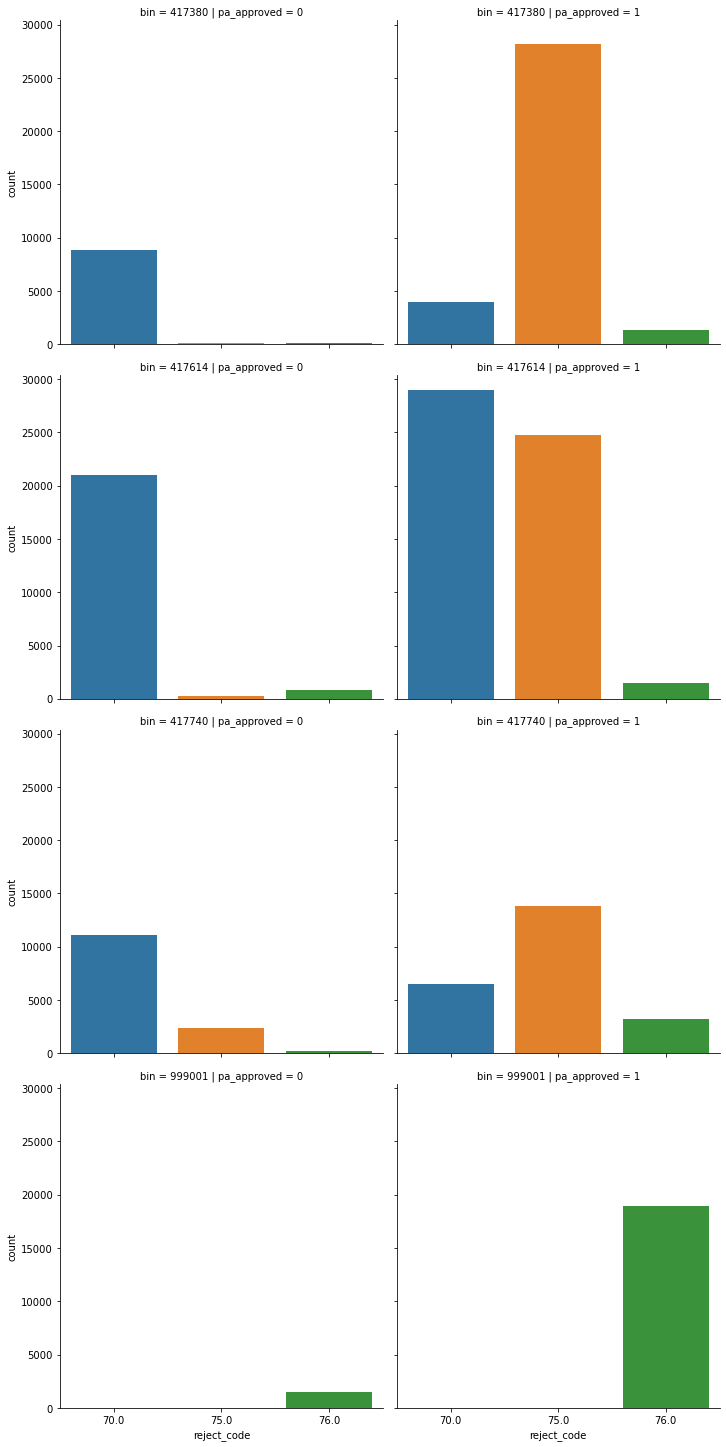

In [45]:
# Type T1
T1_type = dim_pa_claim_rejected[dim_pa_claim_rejected['Type']=='T1']

T1_approved = T1_type[T1_type['pa_approved']==1]
T1_rejected = T1_type[T1_type['pa_approved']==0]

# claim reject codes of T1_approved
sns.catplot(data = T1_type, x='reject_code', kind='count',col = 'pa_approved', row='bin', hue_order=['A','B','C'])


Type T1: Likely to be approved if the intial claim was rejected with reject_code 75 and 76. Initial claims rejected with reject_code 70 are less likely to be approved. However there is an exception of drug A with payer 417614. 
<br>
Type T2 : Similar conclusion as type T1. Exception : payer 417614 approved more PA requests for drug A than rejections. They seem to give importance to 'tried_and_failed' for drug A.
<br>
Type T3 : Generally PAs for claims with reject code 75 are still likely to be approved. However for claims rejected with with reject code 70 are not likely to be approved. Payers pay more importance to 'tried_and_failed' than 'contraindication'.
<br>
Type T4 : Generally PAs for claims with reject code 75 are still likely to be approved. However for claims rejected with reject code 70 are not likely to be approved.
<br>
Type T5 : Tried and failed seems to be sufficient for most claims with reject code 75. However, not so for claims rejected with code 70. With exception of payer 417614 who is more likely to approve drug A if 'tried_and_failed' is true.
<br>
Type T6 : Just tried and tested and contraindication is not sufficient for approval for claims rejected with reject_code 70.
<br>
Type T7 : Contraindication alone is not sufficient for the approval for drugs rejected with reject code 70.
<br>
Type T8 : PA claims rejected with reject code 75 are still likely to be approved. However, drugs with code 70 are not.


## Summary
<br>
In general, claims rejected with reject code 75, 76 are more likely to be approved than those with reject code 70.
<br>
Payers seem to pay importance to 'correct_diagnosis' and 'tried_and_failed' for PA approval.
<br>

In [46]:
# # Group dim_pa_claim_rejected data into different payers

# def payer_groups (df, col):
#     payers = {}
#     bins = df[col].unique()

#     for i in bins :
#         payers['payer_'+str(i)] = df[df[col]==i]
#     return payers

In [47]:
# Payer = payer_groups(dim_pa_claim_rejected, 'bin')

# What decides whether a claim rejected with code=70 gets approved or not?

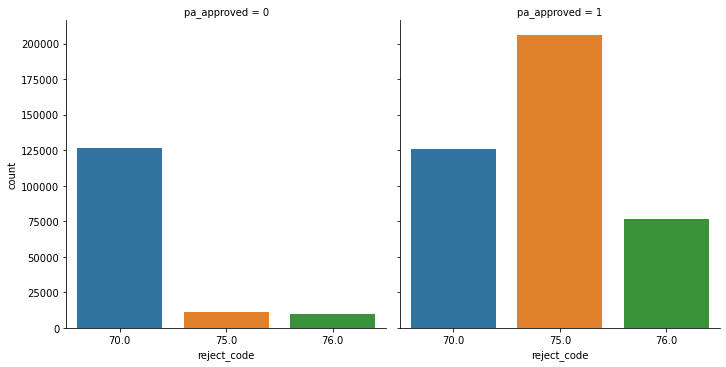

In [48]:
sns.catplot(data=dim_pa_claim_rejected, x='reject_code', kind='count',col ='pa_approved')

In [89]:
# Select claims rejected with code:70
claim_rejected_code70 = dim_pa_claim_rejected[dim_pa_claim_rejected.reject_code==70]

In [84]:
# number of observations
len(claim_rejected_code70)

252206

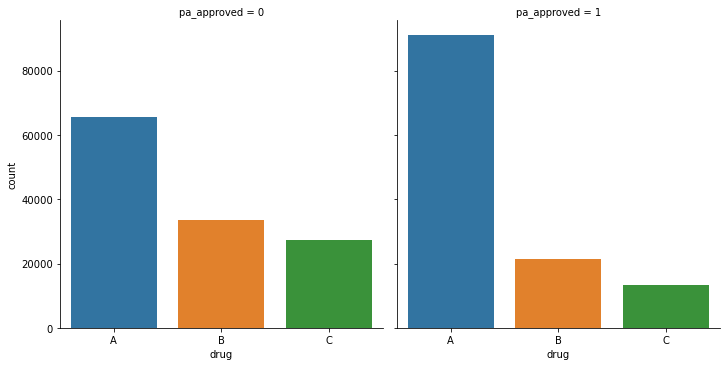

In [90]:
# Drug distribution
sns.catplot(x='drug',kind='count',data=claim_rejected_code70, col='pa_approved')

In [95]:
# Select Drug A alone
claim_rejected_code70_drugA = claim_rejected_code70[claim_rejected_code70['drug']=='A']

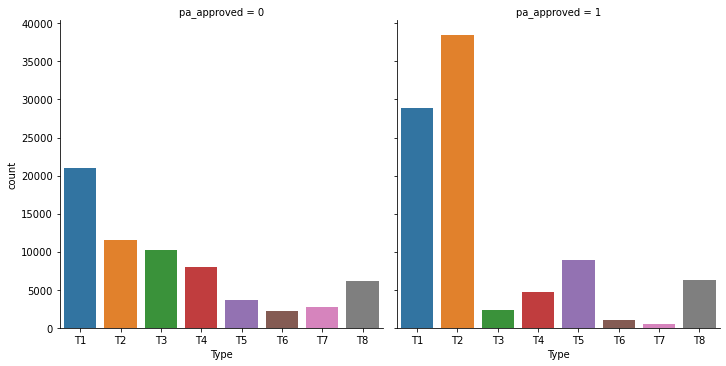

In [96]:
# Distribution of PA conditions
sns.catplot(data=claim_rejected_code70_drugA, x='Type', kind='count', col='pa_approved', order=['T1','T2','T3','T4','T5','T6','T7','T8'])

In [54]:
# Select Type T1 of drug A alone
claim_rejected_code70_drugA_TypeT1 = claim_rejected_code70_drugA[claim_rejected_code70_drugA.Type=='T1']

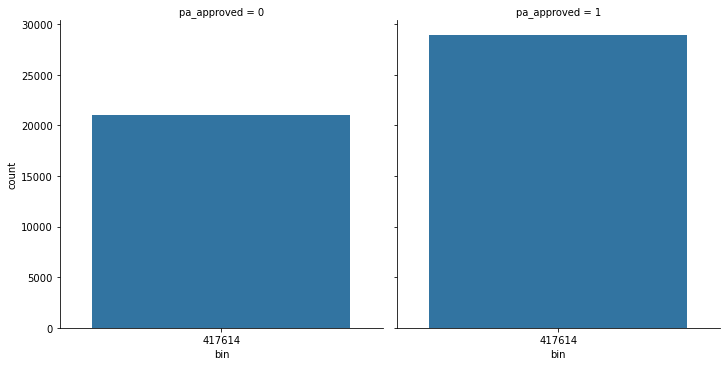

In [55]:
# Distribution of bin 

sns.catplot(data=claim_rejected_code70_drugA_TypeT1, x='bin', kind='count',col='pa_approved')

### The claims initially rejected with reject_code 75 and 76 have a high chance of being approved. However, claims rejected with reject code 70 are harder to get approved. 

### When analyzed for a single drug (A), PA's of type T1 and T2 are highly likely to be approved. 
### However, for a given type (say T1), there is a high chance of the PA to be approved or rejected for the same insurance company. There must be a third variable that is influencing the decision of the company.

## Contraindication has a negative influence on the approval of a PA. Once Contraindication=1, the number of rejected > number of approved. However, correct_diagnosis and tried_and_failed are looked at favorably. 

# DATE table

In [56]:
dim_date = pd.read_csv('../CoverMyMeds_data/dim_date.csv')

In [57]:
dim_date.head()

,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,2017-01-02,2017,1,2,2,1,0,0
2,3,2017-01-03,2017,1,3,3,1,1,0
3,4,2017-01-04,2017,1,4,4,1,1,0
4,5,2017-01-05,2017,1,5,5,1,1,0


In [58]:
# merge bridge['dim_claim_id'] and CLAIMS tables
dim_claim_date=dim_claim_bridge.merge(dim_date, on='dim_date_id', how='inner')

In [97]:
dim_claim_date.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,reject_reason,dim_pa_id,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,417380,A,75.0,0,In_formulary_needs_PA,1.0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,999001,A,-99.0,1,Approved,NaN,1,2017-01-01,2017,1,1,1,0,0,1
2,3,417740,A,76.0,0,Limit_exceeded,2.0,1,2017-01-01,2017,1,1,1,0,0,1
3,4,999001,A,-99.0,1,Approved,NaN,1,2017-01-01,2017,1,1,1,0,0,1
4,5,417740,A,-99.0,1,Approved,NaN,1,2017-01-01,2017,1,1,1,0,0,1


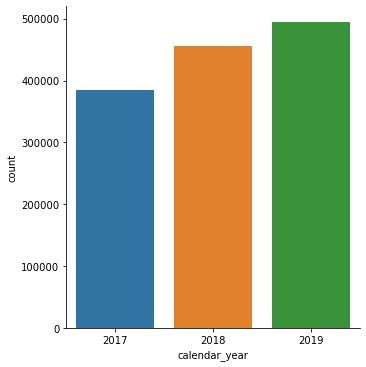

In [102]:
# Claim distribution across years
sns.catplot(data=dim_claim_date, x='calendar_year', kind='count')

#### The number of claims across the years have increased

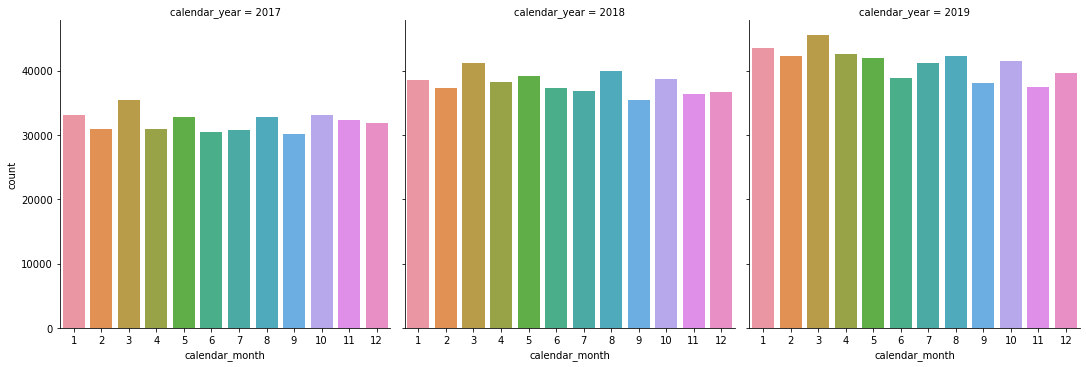

In [104]:
# Claim distribution across the year
sns.catplot(data=dim_claim_date, x='calendar_month', kind='count', col='calendar_year')

#### There is a trend in the number of claims applied for with respect to 'calendar_month'

### Trends in claim approval rate over a month

In [165]:
def date_Claim_approved_month(df, year):
    Claim_approval_rates = []
    for i in range(1, 31):
        Claim_requests = len(df[(df['calendar_day']==i) &(df['calendar_year']==year)])
        Claim_approved = len(df[(df['calendar_day']==i)&(df['pharmacy_claim_approved']==1)&(df['calendar_year']==year)])
        
        Claim_approval_rate = (Claim_approved/Claim_requests)*100
        Claim_approval_rates.append(Claim_approval_rate)
    return Claim_approval_rates

In [166]:
Claim_approval_2017=date_Claim_approved_month(dim_claim_date, 2017)
Claim_approval_2018=date_Claim_approved_month(dim_claim_date, 2018)
Claim_approval_2019=date_Claim_approved_month(dim_claim_date, 2019)
Claim_approval_avg = np.sum([Claim_approval_2017,Claim_approval_2018,Claim_approval_2019], axis=0)/3.

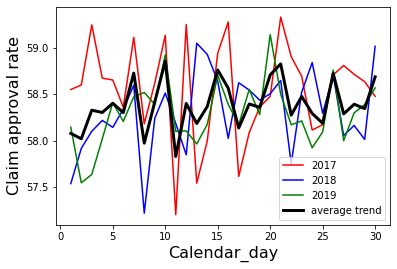

In [169]:
plt.plot(range(1,31), Claim_approval_2017, color='r', label='2017')
plt.plot(range(1,31), Claim_approval_2018, color='b', label='2018')
plt.plot(range(1,31), Claim_approval_2019, color='g', label='2019')
plt.plot(range(1,31), Claim_approval_avg, color='k', linewidth = 3.0, label='average trend')
plt.legend()
plt.xlabel('Calendar_day', fontsize=16)
plt.ylabel('Claim approval rate', fontsize=16)
plt.show()

### Trends in claim approval rate over a week

In [161]:
def date_Claim_approved_week(df, year):
    Claim_approval_rates = []
    for i in range(1, 8):
        Claim_requests = len(df[(df['day_of_week']==i) &(df['calendar_year']==year)])
        Claim_approved = len(df[(df['day_of_week']==i)&(df['pharmacy_claim_approved']==1)&(df['calendar_year']==year)])
        
        Claim_approval_rate = (Claim_approved/Claim_requests)*100
        Claim_approval_rates.append(Claim_approval_rate)
    return Claim_approval_rates

In [162]:
Claim_approval_2017=date_Claim_approved_week(dim_claim_date, 2017)
Claim_approval_2018=date_Claim_approved_week(dim_claim_date, 2018)
Claim_approval_2019=date_Claim_approved_week(dim_claim_date, 2019)
Claim_approval_avg = np.sum([Claim_approval_2017,Claim_approval_2018,Claim_approval_2019], axis=0)/3.

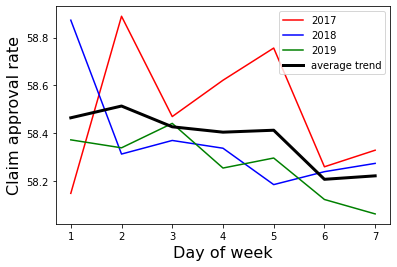

In [164]:
plt.plot(range(1,8), Claim_approval_2017, color='r', label='2017')
plt.plot(range(1,8), Claim_approval_2018, color='b', label='2018')
plt.plot(range(1,8), Claim_approval_2019, color='g', label='2019')
plt.plot(range(1,8), Claim_approval_avg, color='k', linewidth = 3.0, label='average trend')
plt.xlabel('Day of week', fontsize = 16)
plt.ylabel('Claim approval rate', fontsize =16)
plt.legend()
plt.show()

### Overall there is no significant trend in the claim approval rate across the month /week.

In [59]:
# Pharmacy claim rejected
dim_date_claim_rejected = dim_claim_date[dim_claim_date['pharmacy_claim_approved']==0]

In [60]:
# merge dim_date_claim_rejected with dim_PA_copy
dim_date_claim_pa =dim_date_claim_rejected.merge(dim_PA_copy, on='dim_pa_id', how='inner')

In [61]:
dim_date_claim_pa.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,reject_reason,dim_pa_id,dim_date_id,date_val,calendar_year,...,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved,Type
0,1,417380,A,75.0,0,In_formulary_needs_PA,1.0,1,2017-01-01,2017,...,1,1,0,0,1,1,1,0,1,T2
1,3,417740,A,76.0,0,Limit_exceeded,2.0,1,2017-01-01,2017,...,1,1,0,0,1,1,0,0,1,T1
2,10,417380,A,75.0,0,In_formulary_needs_PA,3.0,1,2017-01-01,2017,...,1,1,0,0,1,0,0,1,1,T7
3,11,999001,A,76.0,0,Limit_exceeded,4.0,1,2017-01-01,2017,...,1,1,0,0,1,1,1,0,1,T2
4,15,417614,A,70.0,0,Not_in_formulary,5.0,1,2017-01-01,2017,...,1,1,0,0,1,0,1,0,1,T5


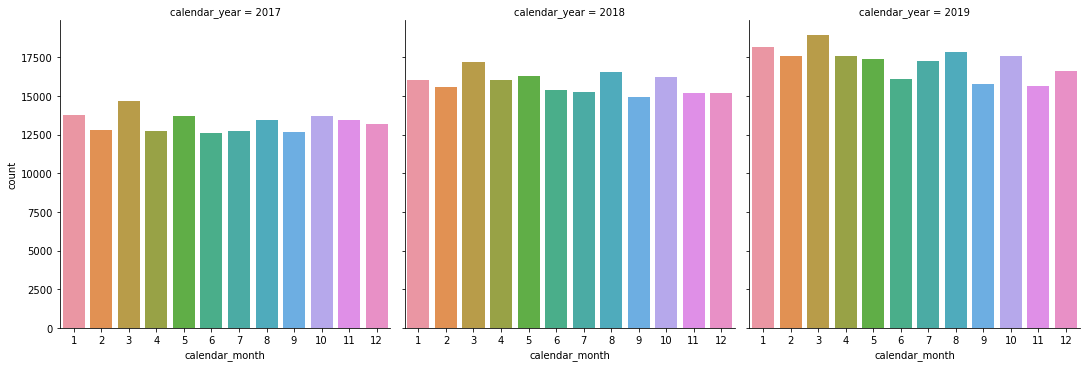

In [68]:
sns.catplot(data = dim_date_claim_pa, x='calendar_month', col = 'calendar_year', kind='count')

#### There is a dip in the number of PA requests in the months of June, September, November and December. With requests generally peaking around Jan - March

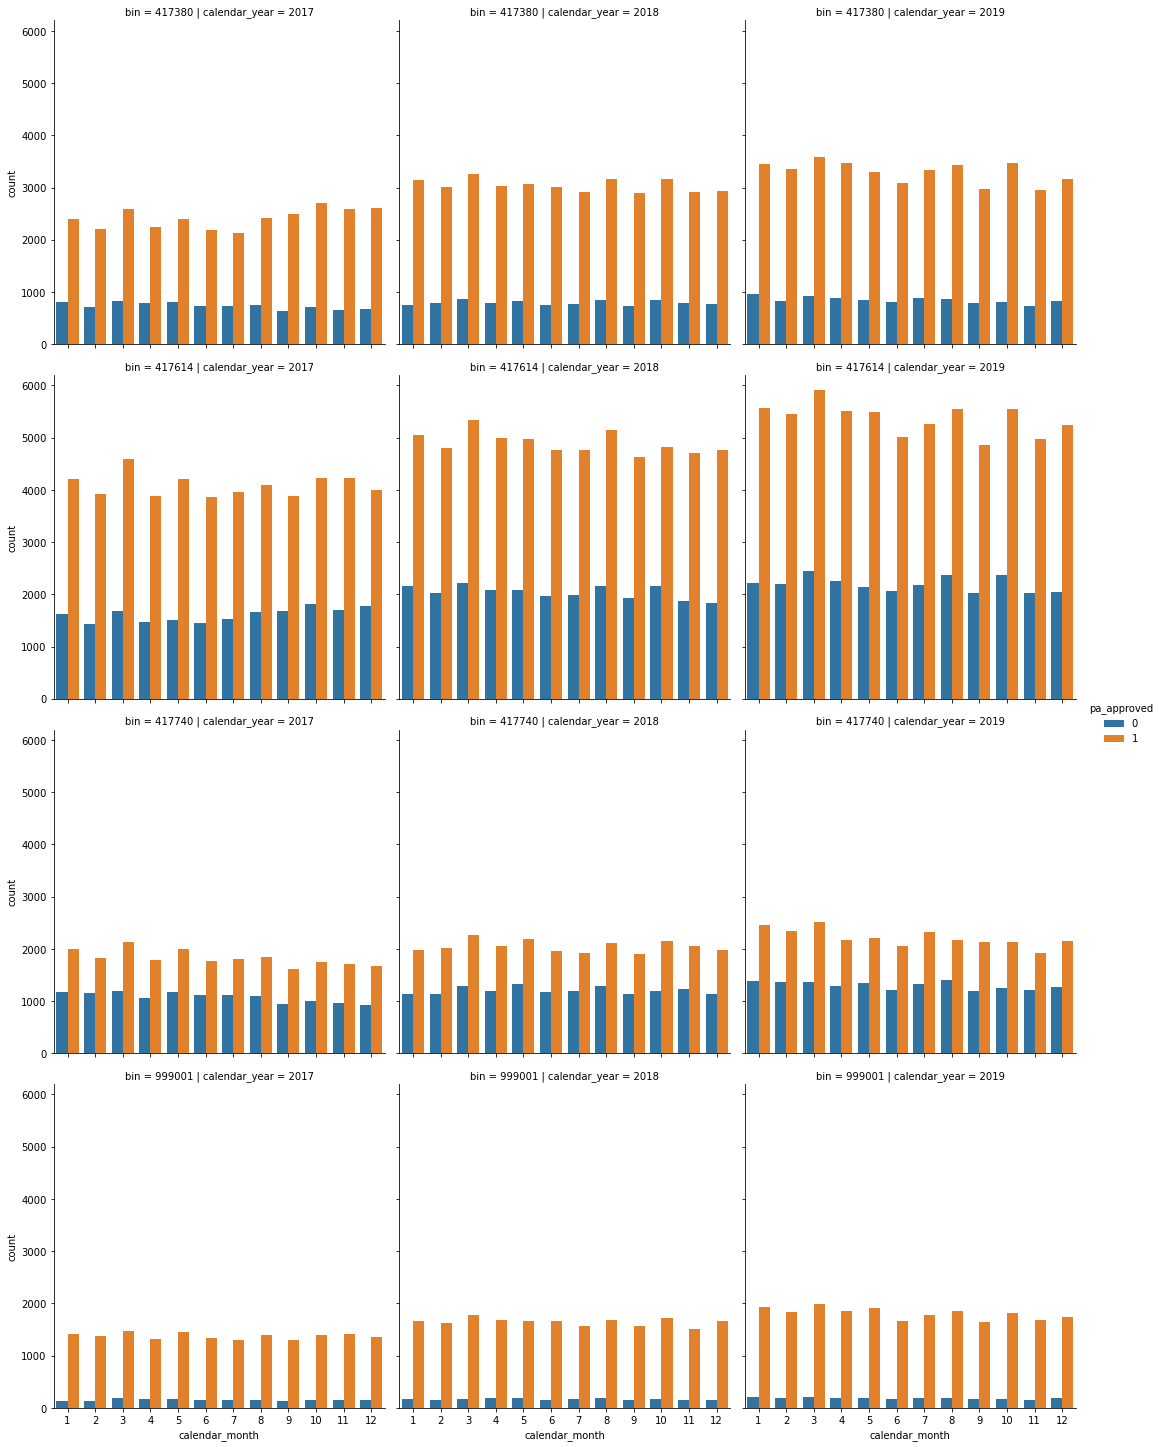

In [69]:
sns.catplot(data = dim_date_claim_pa, x='calendar_month', col = 'calendar_year', kind='count', hue='pa_approved', row='bin')

### The trends in PA rejection is fairly constant across months. However, there are small variations in the approval trend which might be due to the variation in the total number of PAs received per month. However, this variation is not significant.

In [71]:
def date_PA_approved(df, year):
    PA_approval_rates = []
    for i in range(1, 13):
        PA_requests = len(df[(df['calendar_month']==i) &(df['calendar_year']==year)])
        PA_approved = len(df[(df['calendar_month']==i)&(df['pa_approved']==1)&(df['calendar_year']==year)])
        
        PA_approval_rate = (PA_approved/PA_requests)*100
        PA_approval_rates.append(PA_approval_rate)
    return PA_approval_rates

In [72]:
approval_rate_2019 = date_PA_approved(dim_date_claim_pa, 2019)
approval_rate_2018 = date_PA_approved(dim_date_claim_pa, 2018)
approval_rate_2017 = date_PA_approved(dim_date_claim_pa, 2017)

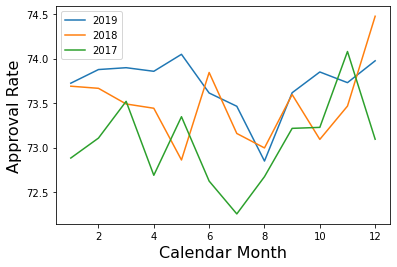

In [73]:
# Variation of approval rate with month
plt.plot (range(1,13), approval_rate_2019, label ='2019')
plt.plot (range(1,13), approval_rate_2018, label='2018')
plt.plot (range(1,13), approval_rate_2017, label='2017')
plt.xlabel('Calendar Month', fontsize =16)
plt.ylabel('Approval Rate', fontsize=16)
plt.legend()
plt.show()

#### There is a small variation in the PA approval rate across the year, however, it is not significant.

In [78]:
%config Completer.use_jedi = False

In [80]:
# correlation of pa_approval and date information
date_information = dim_date_claim_pa[['calendar_year', 'calendar_month', 'calendar_day', 'day_of_week',
       'is_weekday', 'is_workday', 'is_holiday','pa_approved']]

date_information.corr()['pa_approved']

calendar_year     0.005768
calendar_month    0.000591
calendar_day      0.000235
day_of_week      -0.000015
is_weekday        0.000143
is_workday        0.000353
is_holiday        0.000418
pa_approved       1.000000
Name: pa_approved, dtype: float64

#### No correlation between pa approval and date 

In [172]:
number_of_PA_by_year=dim_date_claim_pa.groupby(['calendar_year','calendar_month'], as_index=False).agg({'dim_claim_id':'count'})

Text(0, 0.5, 'Number of PA requests')

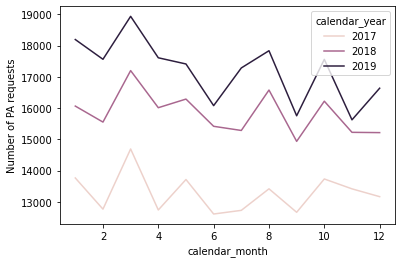

In [174]:
sns.lineplot(data=number_of_PA_by_year, x='calendar_month', y = 'dim_claim_id', hue='calendar_year')
plt.ylabel('Number of PA requests')

#### A clear dip in the number of PAs in June, September, November and December

(0.0, 35000.0)

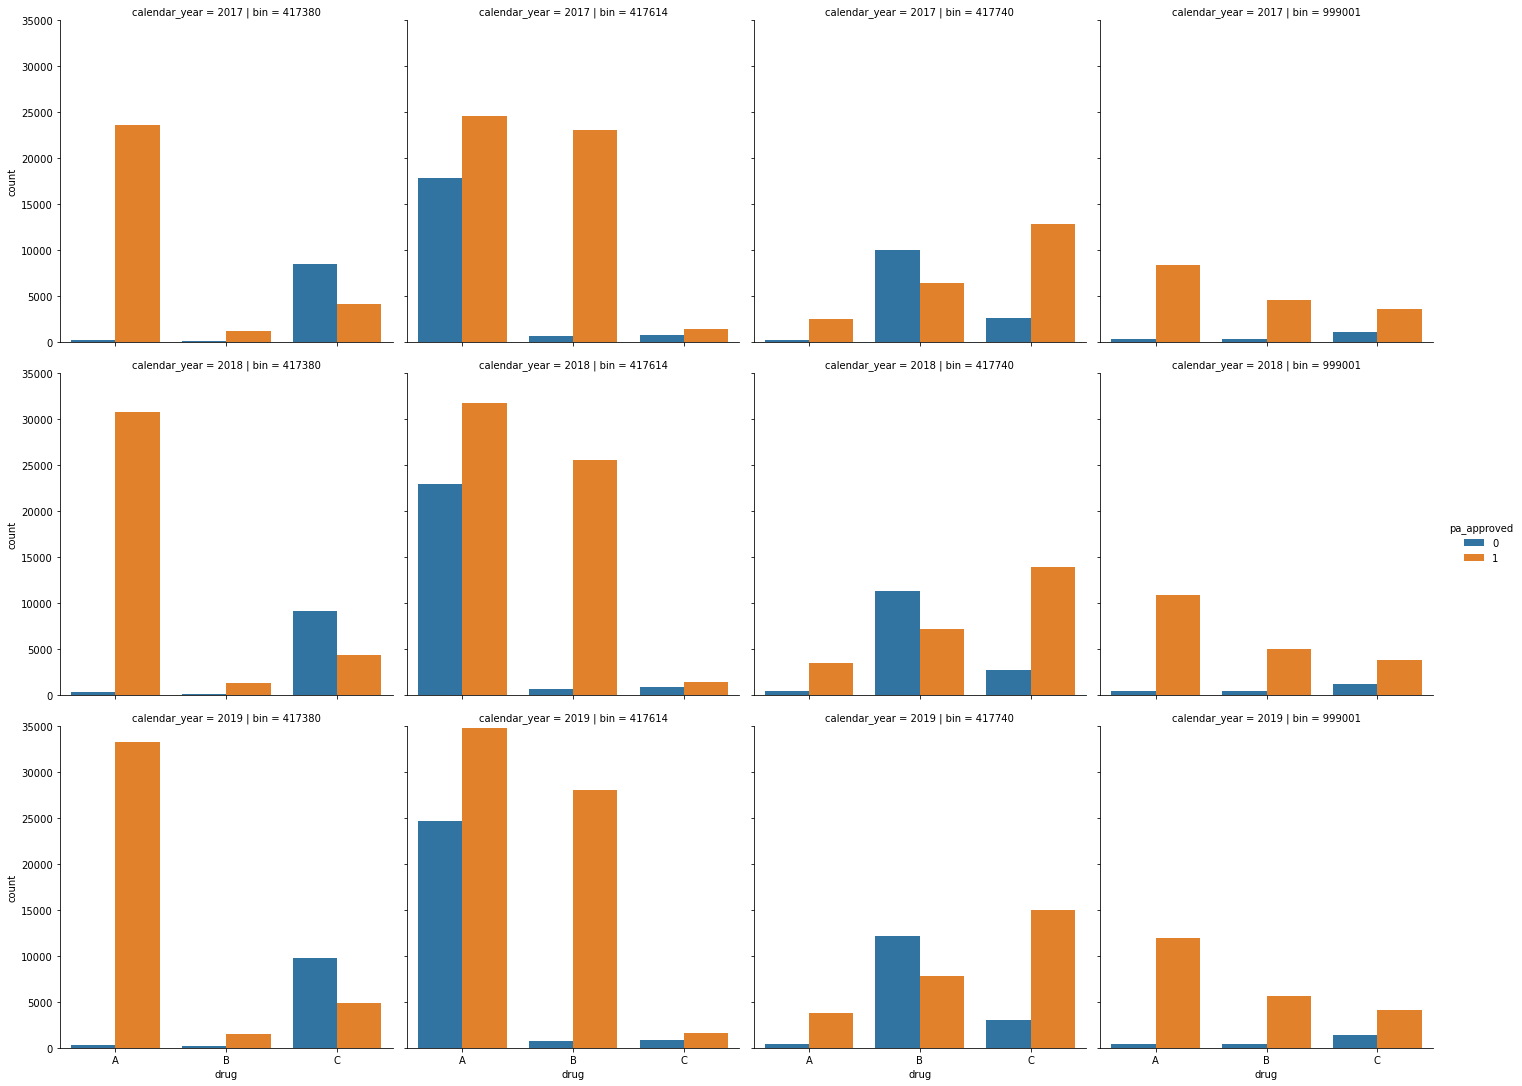

In [171]:
# yearly trends of approval/rejection of drugs for different payers

sns.catplot(data = dim_date_claim_pa, x='drug', row = 'calendar_year', kind='count', col='bin', hue='pa_approved')
plt.ylim(0,35000)

### The trends in PA approval for each payer across years has been same. 

# summary of EDA

1. 1.3 million claims
2. Four insurance companies - 417380, 417614, 417740, 999001
3. 3 drugs - A,B and C
4. 3 rejection codes - 70, 75 and 76
5. All the 3 drugs are equally likely to be approved/rejected in general.

6. Information on the formulary of the four insurance companies: <br>
    
    BIN 417380 : Drug C is not in the formulary, Drug A is in the formulary but needs PA, Drug B is covered but limit exceeded <br>
    BIN 417614 : Drug A is not in the formulary, Drug B is in the formulary, needs PA, Drug C is covered but limit exceeded <br>
    BIN 417740 : Drug B is not in the formulary, Drug C is in the formulary, needs PA, Drug A is covered but limit exceeded <br>
    BIN 999001 : All drugs covered, limit exceeded for all.

7. Claims rejected with reject_code 75 and 76 are highly likely to be approved. However, those with reject_code=70 are hard to get approved in general. 

8. PA's of type T1 (correct_diagnosis =1) and T2 (correct_diagnosis = 1 and tried_and_failed =1)are highly likely to be approved. 

9. Contraindication does not help in the approval of a PA. Once Contraindication =1, the chance of approval goes down.

10. In addition to the given information, there might be other variables that influence the decision of a PA.



# Questions I would like to tackle

1. When a patient insured with company X is prescribed drug Y, what is the probability that the pharamcy claim will be approved?/ will the claim be approved?

2. If the claim will not be approved, what could be the rejection code?

3. For the given rejection code, what information in the PA can help increase the chance of the PA being approved? 